In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [16]:
#df['quality'].head()

# Part 1: Data Cleaning

In [1]:
#Create function which shows if any row has NaN's

In [14]:
def check_NaNs(df):
    print('*******')
    count_nulls = df.isnull().sum().sum()
    if count_nulls > 0:
        for col in df.columns:
            print('NaNs in', col + ": ", df[col].isnull().sum())
    else: 
        print('No NaNs in dataframe')
    print('*******')
    print('')
check_NaNs(df)

*******
No NaNs in dataframe
*******



In [51]:
df = df.drop(columns='Id')

Use classification predictive modeling (6-10 ratings of quality), logistic regression for predictive modeling, or just a plain regression to highlight how important certain variables are (inference).

No feature engineering needed, unless I want to create any dummy or interaction variable based on the EDA.

Split into three parts (after FE), EDA, inference (using multiple linear regression) and prediction.

Check NaN's.

XGBoost? Seaborn? Lasso regression?

# Part 2: EDA

In [52]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


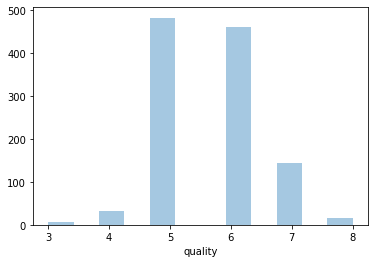

In [59]:
sns.distplot(df['quality'], kde=False, bins=12)

In [48]:
#other kinds are hex and reg

In [86]:
dfc = df.corr()

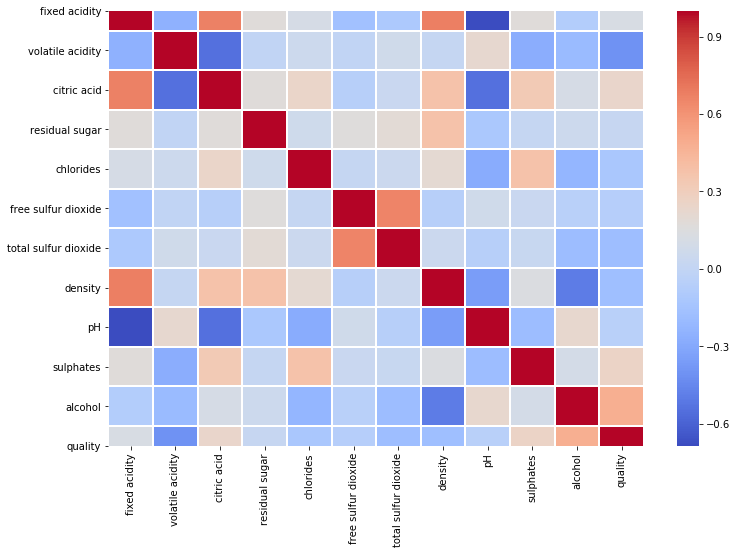

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(dfc, cmap='coolwarm', linecolor='white', linewidths=1)
#annot = True

In [99]:
dfc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [107]:
dfc['quality']

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

In [110]:
#Highlight those with a correlation, absolute value of more than 0.2
#Alcohol, volatile acidity, sulphates and citric acid seems to be key for predicting quality.

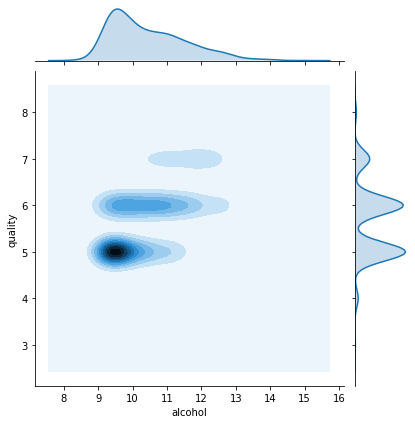

In [100]:
sns.jointplot(x='alcohol', y='quality', data=df, kind='kde')

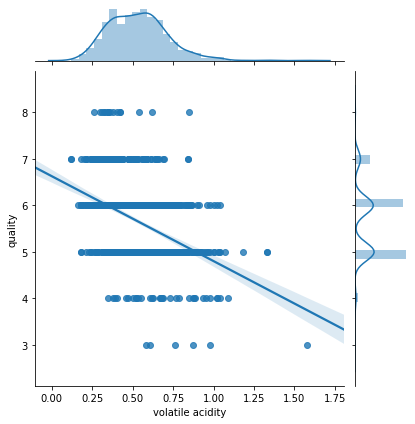

In [104]:
sns.jointplot(x='volatile acidity', y='quality', data=df, kind='reg')

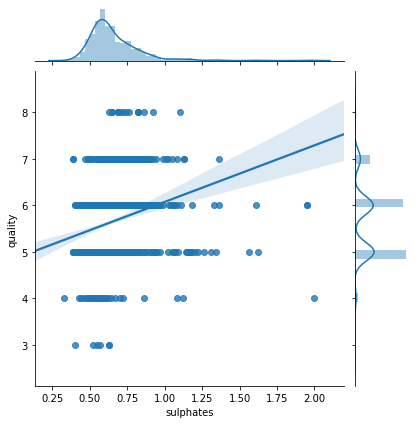

In [105]:
sns.jointplot(x='sulphates', y='quality', data=df, kind='reg')

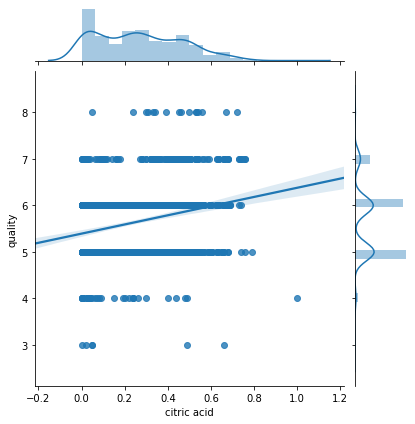

In [106]:
sns.jointplot(x='citric acid', y='quality', data=df, kind='reg')

In [127]:
#Potential to create interaction variables or some dummies

<Figure size 1728x1152 with 0 Axes>

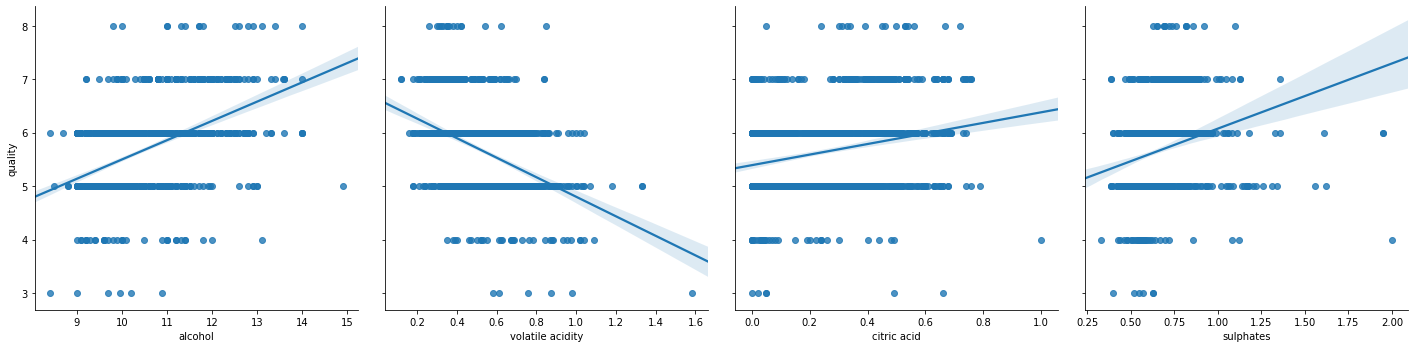

In [141]:
plt.figure(figsize=(24,16))
sns.pairplot(df, x_vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates'], y_vars = 'quality', kind='reg', height=5)

# Part 3: Statistical Analysis

In [111]:
#Multiple linear regression with the variables we highlighted as dependent variables

In [117]:
from sklearn.linear_model import LinearRegression

In [119]:
mlr = LinearRegression()

In [122]:
x = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]

In [123]:
y = df['quality']

In [126]:
mlr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
from sklearn import metrics

In [149]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [146]:
import statsmodels.formula.api as smf

In [155]:
lm1 = smf.ols(formula='quality ~ alcohol + Q("volatile acidity") + Q("citric acid") + sulphates', data=df).fit()

In [162]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.57e-106
Time:                        13:13:00   Log-Likelihood:                -1126.1
No. Observations:                1143   AIC:                             2262.
Df Residuals:                    1138   BIC:                             2287.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6939      0.233     11.587      0.000       2.238       3.150
alcohol                   0.3080      0.018     16.959      0.000       0.272       0.344
Q("volatile acidity")    -1.2898      0.130     -9.894      0.000      -1.546      -1.034
Q("citric acid")         -0.0263      0.120     -0.220      0.826      -0.261       0.208
sulphates                 0.6687      0.121      5.548      0.000       0.432       0.905
==============================================================================
Omnibus:                       16.927   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.217
Skew:                          -0.067   Prob(JB):                     7.46e-07
Kurtosis:                       3.758   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
#Every coefficient is statistically significant in determining the quality of the wine except for citric acid

In [159]:
lm2 = smf.ols(formula='quality ~ alcohol + Q("volatile acidity") + sulphates', data=df).fit()

In [161]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.96e-107
Time:                        13:11:53   Log-Likelihood:                -1126.2
No. Observations:                1143   AIC:                             2260.
Df Residuals:                    1139   BIC:                             2280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6826      0.227     11.836      0.000       2.238       3.127
alcohol                   0.3080      0.018     16.971      0.000       0.272       0.344
Q("volatile acidity")    -1.2756      0.113    -11.263      0.000      -1.498      -1.053
sulphates                 0.6628      0.117      5.645      0.000       0.432       0.893
==============================================================================
Omnibus:                       16.995   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.282
Skew:                          -0.070   Prob(JB):                     7.22e-07
Kurtosis:                       3.758   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
# Let's make a regression with all other variables
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [168]:
lm3 = smf.ols(formula='quality ~ chlorides + Q("fixed acidity") + Q("residual sugar") + density + pH + Q("fixed acidity") + Q("free sulfur dioxide") + Q("total sulfur dioxide")',
              data=df).fit()

In [169]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     38.63
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           8.29e-49
Time:                        13:18:19   Log-Likelihood:                -1252.5
No. Observations:                1143   AIC:                             2521.
Df Residuals:                    1135   BIC:                             2561.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   232.7140     17.340     13.421      0.000     198.693     266.735
chlorides                    -0.6545      0.496     -1.321      0.187      -1.627       0.318
Q("fixed acidity")            0.2555      0.024     10.562      0.000       0.208       0.303
Q("residual sugar")           0.1041      0.018      5.891      0.000       0.069       0.139
density                    -232.2011     17.780    -13.060      0.000    -267.086    -197.316
pH                            0.6511      0.212      3.065      0.002       0.234       1.068
Q("free sulfur dioxide")      0.0054      0.003      1.891      0.059      -0.000       0.011
Q("total sulfur dioxide")    -0.0040      0.001     -4.396      0.000      -0.006      -0.002
==============================================================================
Omnibus:                       22.986   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.264
Skew:                          -0.094   Prob(JB):                     6.64e-10
Kurtosis:                       3.923   Cond. No.                     6.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
lm4 = smf.ols(formula='quality ~ alcohol + Q("volatile acidity") + sulphates+ Q("fixed acidity") + Q("residual sugar") + density + pH + Q("free sulfur dioxide")',
              data=df).fit()

In [172]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     79.56
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.88e-104
Time:                        13:20:07   Log-Likelihood:                -1120.0
No. Observations:                1143   AIC:                             2258.
Df Residuals:                    1134   BIC:                             2303.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   33.3635     24.915      1.339      0.181     -15.521      82.248
alcohol                      0.2900      0.031      9.368      0.000       0.229       0.351
Q("volatile acidity")       -1.1723      0.119     -9.867      0.000      -1.405      -0.939
sulphates                    0.6700      0.125      5.371      0.000       0.425       0.915
Q("fixed acidity")           0.0427      0.028      1.498      0.134      -0.013       0.099
Q("residual sugar")          0.0073      0.019      0.391      0.696      -0.029       0.044
density                    -30.7355     25.408     -1.210      0.227     -80.587      19.116
pH                          -0.0728      0.215     -0.339      0.735      -0.495       0.349
Q("free sulfur dioxide")    -0.0031      0.002     -1.612      0.107      -0.007       0.001
==============================================================================
Omnibus:                       19.599   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.956
Skew:                          -0.120   Prob(JB):                     1.15e-07
Kurtosis:                       3.783   Cond. No.                     4.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
# they all became bad again

# Part 3: ML Prediction

Since quality can take six different values we use multinomial logistic regression

In [180]:
from sklearn.linear_model import LogisticRegression

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

In [194]:
X = df.drop('quality', axis=1)
y = df['quality']

In [196]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [204]:
Xscale = scaler.transform(X)

array([0.93933222, 1.94181282, 1.27349242, ..., 0.38239855, 0.10393172,
       0.6330187 ])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(Xscale, y,
        test_size=0.33, random_state=42)

In [206]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [207]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
#dataset could be too small

In [218]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [219]:
from sklearn.model_selection import cross_val_score

In [230]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [231]:
n_scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [232]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.597 (0.043)


In [225]:
from numpy import mean

In [226]:
from numpy import std

In [228]:
#That was evaluation, now make predictions

In [234]:
yhat = logreg.predict(X_test)

In [238]:
yhat

array([5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 7, 6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 6, 7, 6, 6, 5, 7, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 4, 5, 5, 5, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 7, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 6, 6, 6, 7, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 7,
       5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5,

In [251]:
range(len(yhat))

range(0, 378)

In [268]:
y_test_s =y_test.reset_index()
y_test_s

,index,quality
0,158,5
1,1081,6
2,291,5
3,538,6
4,367,6
...,...,...
373,457,5
374,33,5
375,881,5
376,1030,8


In [272]:
y_t = y_test_s.drop('index', axis =1)
y_t

,quality
0,5
1,6
2,5
3,6
4,6
...,...
373,5
374,5
375,5
376,8


In [276]:
y_test_final = y_t['quality']

In [277]:
y_test_final

0      5
1      6
2      5
3      6
4      6
      ..
373    5
374    5
375    5
376    8
377    7
Name: quality, Length: 378, dtype: int64

In [280]:
def accuracy(predictions,test):
    if len(predictions) == len(test):
        correct = 0
        for i in range(len(predictions)):
            if predictions[i] == test[i]:
                correct = correct + 1
        return correct/len(predictions)
    else:
        print('*******')
        print('Length of inputs are not equal')
        print('*******')

In [281]:
accuracy(yhat,y_test_final)

0.626984126984127